In [464]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import json
import ast
from tqdm import tqdm

In [25]:
c = 14
emission_data = {}
day = '2018-04-01'
emission_days = [day]
while c > 0:
    with open('/Users/mac/gravity/datasets/dataset_9/output_9.1/emission_'+day+'T11:00:00.csv', newline='') as emission:
        emission_data[day] = []
        r = csv.reader(emission, delimiter=';')
        for row in emission:
            row = row.strip().split(';')
            #emission_data[row[0]] = [float(i) for i in row[1:]]
            row = [row[0]]+[float(i) for i in row[1:]]
            emission_data[day].append(row)
        day = add_week(day)
        emission_days.append(day)
        c -=1
emission_days = list(emission_data.keys())

## Emission days

In [233]:
emission_days

['2018-04-01',
 '2018-04-08',
 '2018-04-15',
 '2018-04-22',
 '2018-04-29',
 '2018-05-06',
 '2018-05-13',
 '2018-05-20',
 '2018-05-27',
 '2018-06-03',
 '2018-06-10',
 '2018-06-17',
 '2018-06-24',
 '2018-07-01']

In [113]:
global_emission = []
with open('/Users/mac/gravity/datasets/dataset_9/output_9.1/global_emission.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        global_emission.append(row)
global_emission = global_emission[1:]

In [32]:
last_peak_activity = [float(i[5]) for i in global_emission]
current_activity = [float(i[4]) for i in global_emission]
delta_current_last = [float(i[4])-float(i[5]) for i in global_emission]

## System activity

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


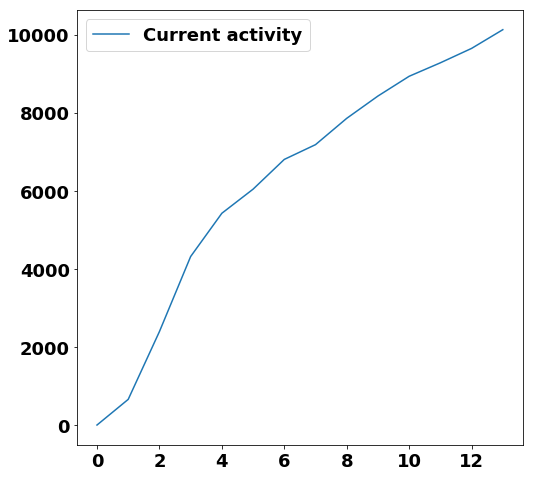

In [465]:
plt.plot(current_activity, label='Current activity')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.legend(loc='upper left')
plt.show()

In [280]:
transactions = []
tx_days = []
with open('/Users/mac/gravity/datasets/dataset_9/transaction_history9.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        transactions.append(row)
        if row[0][0:10] not in tx_days:
            tx_days.append(row[0][0:10])

In [69]:
volumes = []
emission_volumes = {}
tx_count = []
for day in emission_days[:-1]:
    emission_volumes[day] = 0
    index = emission_days.index(day)
    count = 0
    for row in transactions:
        if row[0][0:10] >= day and row[0][0:10] < emission_days[index+1]:
            emission_volumes[day] += float(row[3])
            count +=1
    volumes.append(emission_volumes[day])
    tx_count.append(count)

## Weekly dynamics

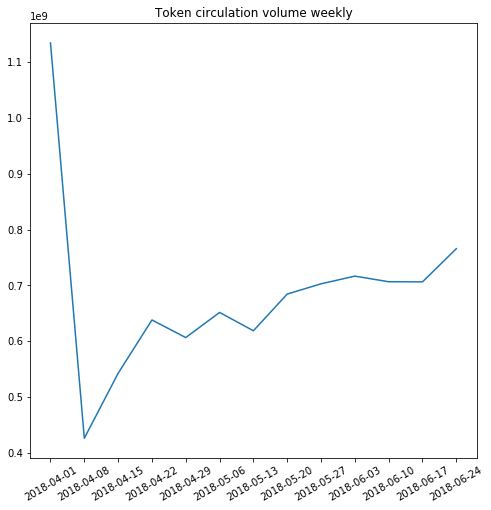

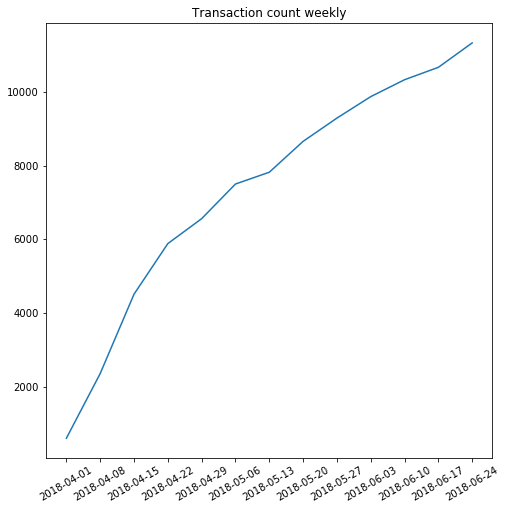

In [74]:
plt.plot(volumes)
plt.title('Token circulation volume weekly')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days[:-1])), emission_days[:-1], rotation=30)
plt.show()
plt.plot(tx_count)
plt.title('Transaction count weekly')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days[:-1])), emission_days[:-1], rotation=30)
plt.show()

In [106]:
address = 'g1791u5098w9228'
def plot_activity(address, account_type):
    balances = [0]
    for tx in transactions:
        if tx[1] == address:
            b = balances[-1] - float(tx[3])
            balances.append(b)
        elif tx[2] == address:
            b = balances[-1] + float(tx[3])
            balances.append(b)
    print(account_type, len(balances)-1, 'transactions')
    plt.plot(balances)
    plt.title('Account activity')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.ylabel('Balance')
    plt.xlabel('Transaction count')
    plt.show()

In [207]:
def daily_activity(address, account_type):
    balances = [0]
    for day in tx_days:
        b = balances[-1]
        for tx in transactions:
            if tx[0][0:10] == day:
                if tx[1] == address:
                    #print(balances[-1], float(tx[3]))
                    b = balances[-1] - float(tx[3]) - 20
                    balances[-1] = b
                elif tx[2] == address:
                    #print(balances[-1], float(tx[3]))
                    b = balances[-1] + float(tx[3])
                    balances[-1] = b
        balances.append(b)
    print('User:',account_type,'Address:',address)
    plt.plot(balances)
    plt.title('Balance daily')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.xticks(range(len(tx_days))[::10], tx_days[::10], rotation=30)
    plt.ylabel('Balance')
    plt.xlabel('Days')
    plt.show()

def weekly_activity(address, account_type):
    balances = [0]
    volumes = {}
    
    for day in emission_days[:-1]:
        b = balances[-1]
        volumes[day] = 0
        index = emission_days.index(day)
        for tx in transactions:
            if tx[0][0:10] >= day and tx[0][0:10] < emission_days[index+1] and\
            tx[1] == address:
                b = balances[-1] - float(tx[3]) - 20
                balances[-1] = b
                #print(balances[-1], b, float(tx[3]))
            if tx[0][0:10] >= day and tx[0][0:10] < emission_days[index+1] and\
            tx[2] == address:
                b = balances[-1] + float(tx[3])
                balances[-1] = b
                #print(balances[-1], b, float(tx[3]))
        balances.append(b)
    print('User:',account_type,'Address:',address)
    plt.plot(balances)
    plt.title('Balance weekly')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.ylabel('Balance')
    plt.xlabel('Emission days')
    plt.show()
    

In [148]:
balances = {}
with open ('/Users/mac/gravity/datasets/dataset_9/balances9.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        balances[row[0]] = float(row[1])

## Typical account behavior: exchange, buyer, seller, hodler, businesses


In [225]:
exchange = 'g1791u5098w9228'
buyer = 'g2862x9047t7620'
seller = 'g5786v1379d3010'
hodler = 'g1423r1616u9567'
businesses = ['g6924y1671j9109','g6567s7669t5663','g3876a6905z5179','g5226b7996j5986',\
              'g4572u5286z2037','g3840w6875m5321','g1674i9707z6897','g4050f4167s9245']

User: exchange Address: g1791u5098w9228


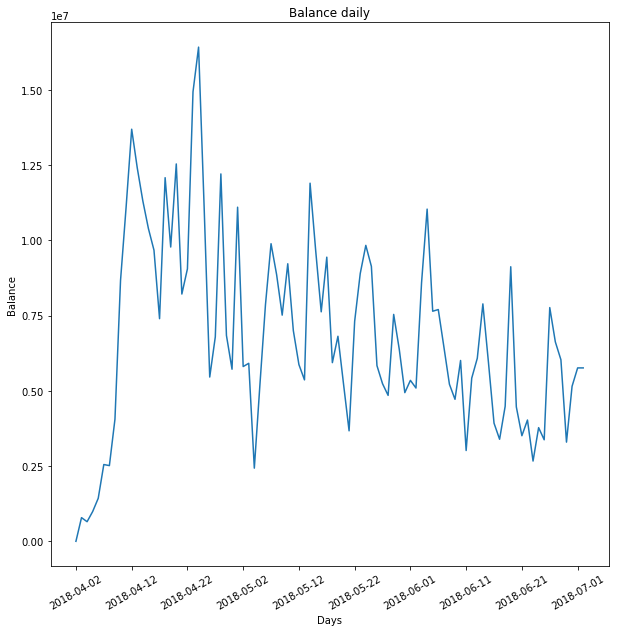

In [209]:
daily_activity(exchange, 'exchange')

User: exchange Address: g1791u5098w9228


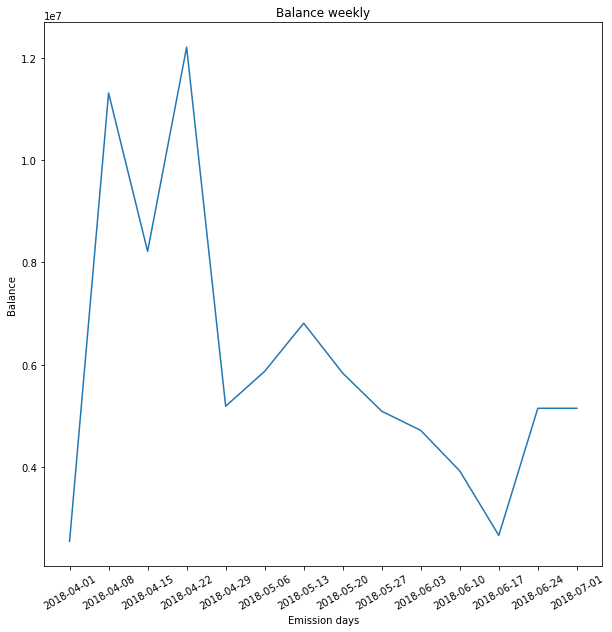

In [210]:
weekly_activity(exchange, 'exchange')

User: buyer Address: g2862x9047t7620


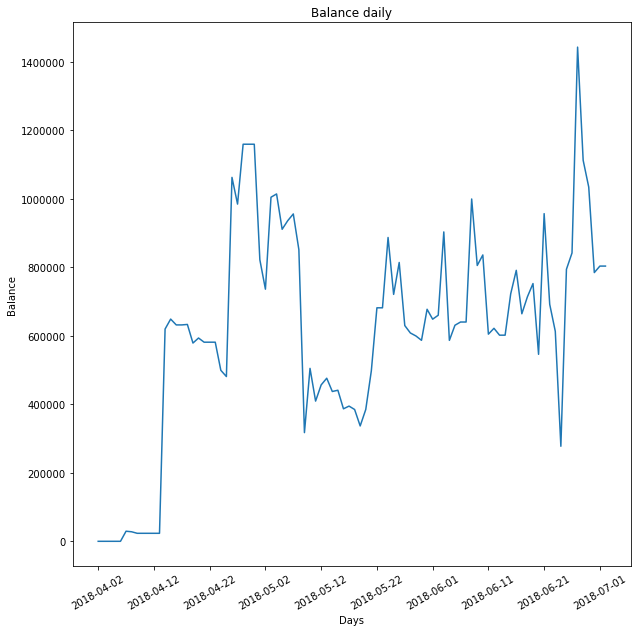

In [211]:
daily_activity(buyer, 'buyer')

User: buyer Address: g2862x9047t7620


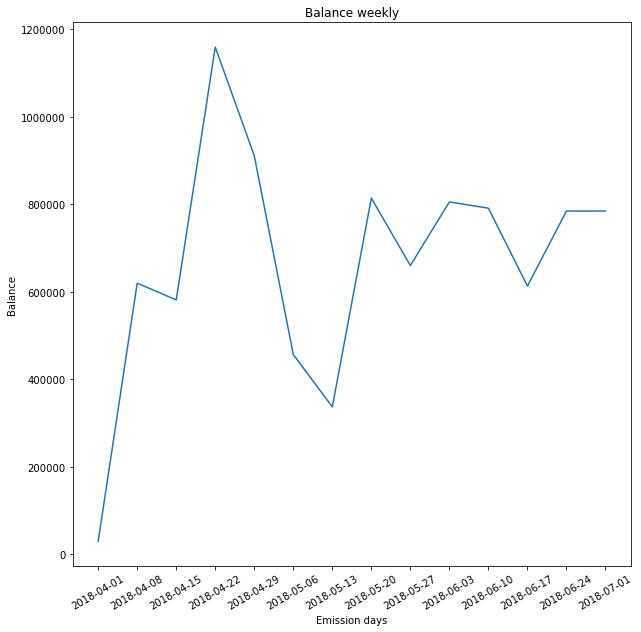

In [212]:
weekly_activity(buyer, 'buyer')

User: hodler Address: g1423r1616u9567


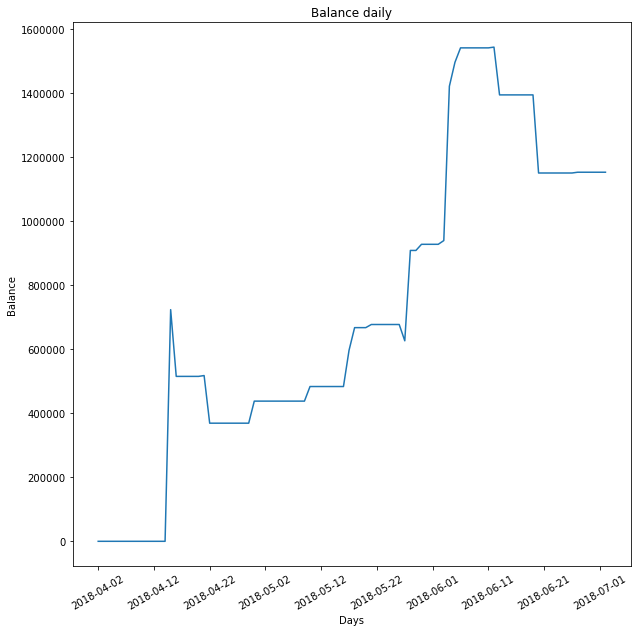

In [213]:
daily_activity(hodler, 'hodler')

User: hodler Address: g1423r1616u9567


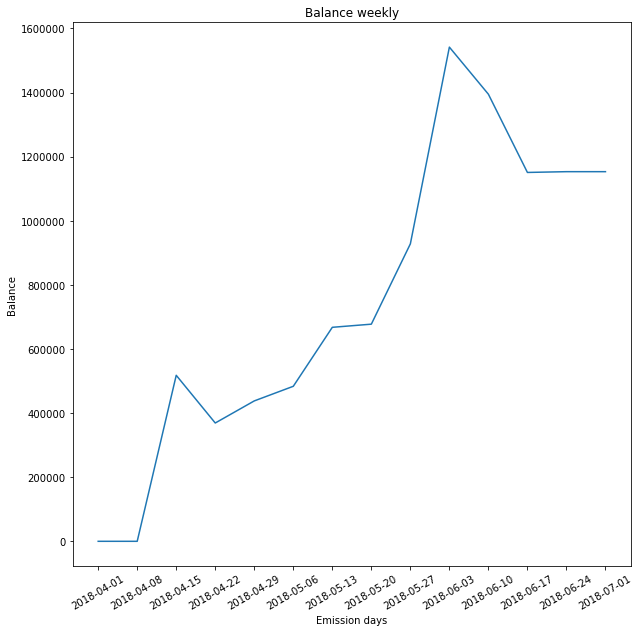

In [214]:
weekly_activity(hodler, 'hodler')

User: seller Address: g5786v1379d3010


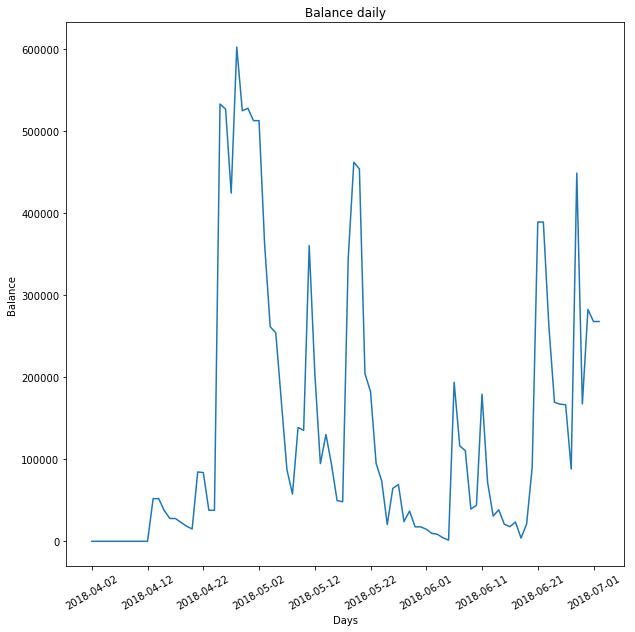

In [215]:
daily_activity(seller, 'seller')

User: seller Address: g5786v1379d3010


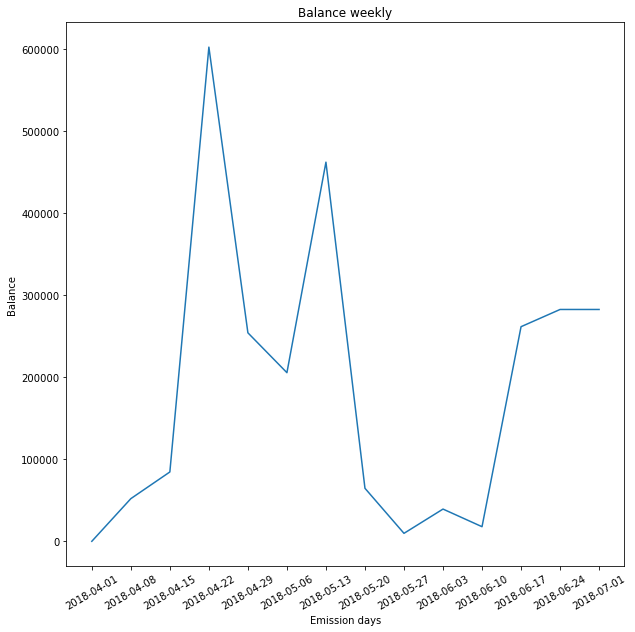

In [216]:
weekly_activity(seller, 'seller')

User: business Address: g6567s7669t5663


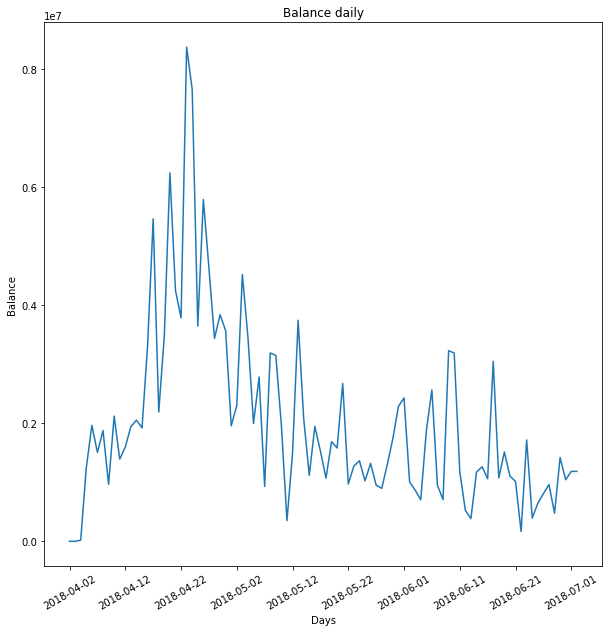

In [219]:
daily_activity(businesses[1], 'business')

User: business Address: g6567s7669t5663


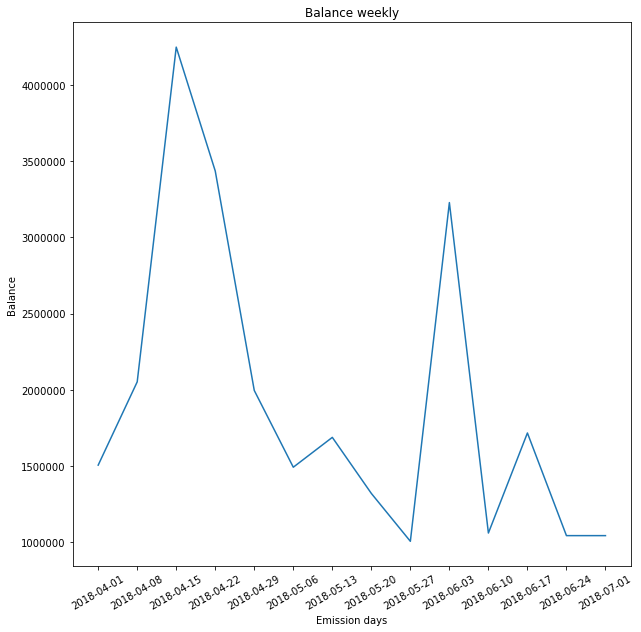

In [220]:
weekly_activity(businesses[1], 'business')

In [252]:
accounts = []
with open('/Users/mac/gravity/datasets/dataset_9/account_history.txt') as file:
    lines = file.readlines()
    for line in lines:
        j = json.loads(json.dumps(line)).strip()
        accounts.append(ast.literal_eval(j))

In [346]:
accounts[0]

{'account_type': 'genesis',
 'address': 'g6058z5762i1084',
 'balance': 795.0500170684647,
 'receive': 0,
 'send': 254}

In [347]:
user_types = {}
for _ in accounts:
    if _['address'] not in businesses:
        user_types[_['address']] = _['account_type']
    else:
        user_types[_['address']] = 'business'

In [281]:
for tx in tqdm(transactions):
    for user in accounts:
        if tx[1] == user['address'] and tx[1] not in businesses:
            tx.append(user['account_type'])
        elif tx[1] == user['address'] and tx[1] in businesses:
            tx.append('business')
        else:
            pass
    for user in accounts:
        if tx[2] == user['address'] and tx[2] not in businesses:
            tx.append(user['account_type'])
        elif tx[2] == user['address'] and tx[2] in businesses:
            tx.append('business')
        else:
            pass

100%|██████████| 96160/96160 [02:41<00:00, 594.92it/s]


In [363]:
index_data = {}
for day in emission_days:
    index_data[day] = []
    with open('/Users/mac/gravity/datasets/dataset_9/output_9.1/emission_' + day + 'T11:00:00.csv',\
              newline='') as file:
        r = csv.reader(file, delimiter=';')
        for row in file:
            row = row.strip().split(';')
            index_data[day].append(row)

In [409]:
seller_gravity_index = []
buyer_gravity_index = []
hodler_gravity_index= []
exchange_gravity_index = []
genesis_gravity_index = []
business_gravity_index = []
seller_activity_index = []
buyer_activity_index = []
hodler_activity_index = []
business_activity_index = []
genesis_activity_index = []
exchange_activity_index = []
seller_emission = []
buyer_emission = []
hodler_emission = []
exchange_emission = []
genesis_emission = []
business_emission = []

for day in emission_days:
    '''
    seller_g = seller_gravity_index[-1]
    buyer_g = buyer_gravity_index[-1]
    hodler_g = hodler_gravity_index[-1]
    exchange_g = exchange_gravity_index[-1]
    genesis_g = genesis_gravity_index[-1]
    business_g = business_gravity_index[-1]
    
    seller_a = seller_activity_index[-1]
    buyer_a = buyer_activity_index[-1]
    hodler_a = hodler_activity_index[-1]
    exchange_a = exchange_activity_index[-1]
    genesis_a = genesis_activity_index[-1]
    business_a = business_activity_index[-1]
    '''
    seller_g = 0
    buyer_g = 0
    hodler_g = 0
    exchange_g = 0
    genesis_g = 0
    business_g = 0
    
    seller_a = 0
    buyer_a = 0
    hodler_a = 0
    exchange_a = 0
    genesis_a = 0
    business_a = 0
    
    seller_e = 0
    buyer_e = 0
    hodler_e = 0
    exchange_e = 0
    genesis_e = 0
    business_e = 0
    
    for state in index_data[day]:
        if user_types[state[0]] == 'seller':
            seller_g += float(state[4])
        if user_types[state[0]] == 'buyer':
            buyer_g += float(state[4])
        if user_types[state[0]] == 'hodler':
            hodler_g += float(state[4])
        if user_types[state[0]] == 'exchange':
            exchange_g += float(state[4])
        if user_types[state[0]] == 'genesis':
            genesis_g += float(state[4])
        if user_types[state[0]] == 'business':
            business_g += float(state[4])
            
    for state in index_data[day]:
        if user_types[state[0]] == 'seller':
            seller_a += float(state[3])
        if user_types[state[0]] == 'buyer':
            buyer_a += float(state[3])
        if user_types[state[0]] == 'hodler':
            hodler_a += float(state[3])
        if user_types[state[0]] == 'exchange':
            exchange_a += float(state[3])
        if user_types[state[0]] == 'genesis':
            genesis_a += float(state[3])
        if user_types[state[0]] == 'business':
            business_a += float(state[3])
            
    for state in index_data[day]:
        if user_types[state[0]] == 'seller':
            seller_e += float(state[5])
        if user_types[state[0]] == 'buyer':
            buyer_e += float(state[5])
        if user_types[state[0]] == 'hodler':
            hodler_e += float(state[5])
        if user_types[state[0]] == 'exchange':
            exchange_e += float(state[5])
        if user_types[state[0]] == 'genesis':
            genesis_e += float(state[5])
        if user_types[state[0]] == 'business':
            business_e += float(state[5])
            
    seller_gravity_index.append(seller_g)
    buyer_gravity_index.append(buyer_g)
    hodler_gravity_index.append(hodler_g)
    exchange_gravity_index.append(exchange_g)
    genesis_gravity_index.append(genesis_g)
    business_gravity_index.append(business_g)
    seller_activity_index.append(seller_a)
    buyer_activity_index.append(buyer_a)
    hodler_activity_index.append(hodler_a)
    business_activity_index.append(business_a)
    genesis_activity_index.append(genesis_a)
    exchange_activity_index.append(exchange_a)
    seller_emission.append(seller_e)
    buyer_emission.append(buyer_e)
    hodler_emission.append(hodler_e)
    exchange_emission.append(exchange_e)
    genesis_emission.append(genesis_e)
    business_emission.append(business_e)

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


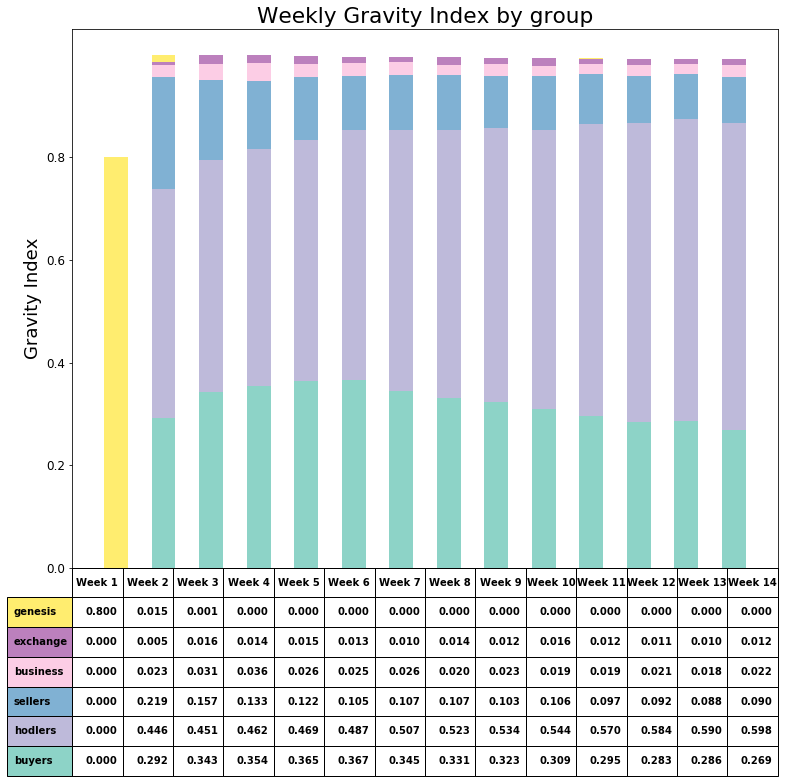

In [440]:
data_gravity_index = [genesis_gravity_index,
                      exchange_gravity_index,
                      business_gravity_index,
                      seller_gravity_index,
                      hodler_gravity_index,
                      buyer_gravity_index]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers']
#rows = rows[::-1]

values = np.arange(0, 1, 0.2)
step = 1
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

cell_text = []
for row in range(n_rows):
    plt.bar(index, data_gravity_index[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_gravity_index[::-1][row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])

colors = colors[::-1]
cell_text.reverse()

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_gravity_index[row]
    t_text.append(['%1.3f' % (x) for x in y_offset])

gravity_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

gravity_table.auto_set_font_size(False)
gravity_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Gravity Index",size=18,weight='light')
plt.yticks(values*step, ['%1.1f' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Gravity Index by group')
plt.show()

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


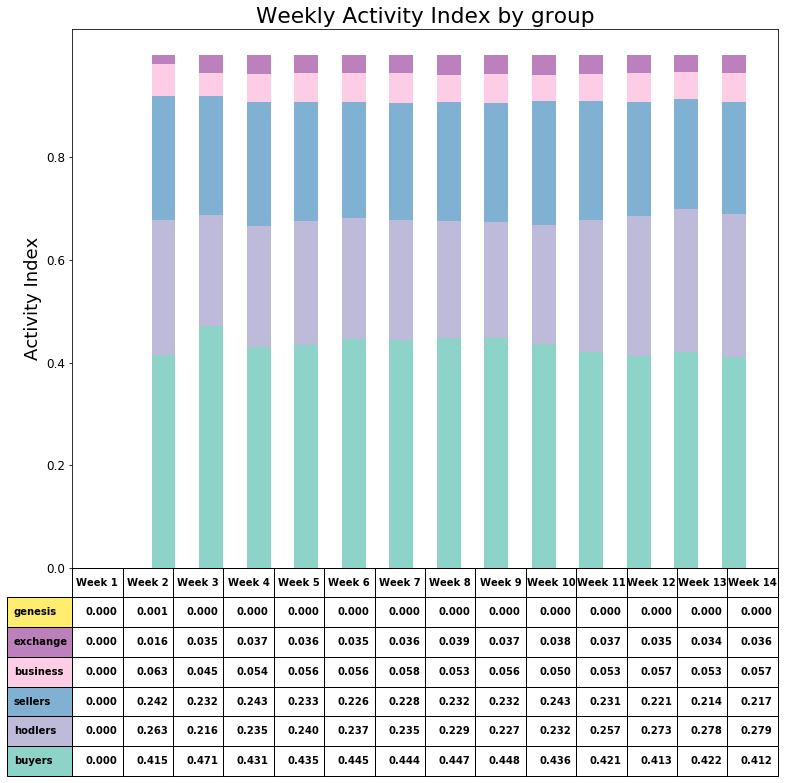

In [439]:
data_activity_index = [genesis_activity_index,
                      exchange_activity_index,
                      business_activity_index,
                      seller_activity_index,
                      hodler_activity_index,
                      buyer_activity_index]

values = np.arange(0, 1, 0.2)
step = 1
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_gravity_index)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_activity_index[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_activity_index[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_activity_index[row]
    t_text.append(['%1.3f' % (x) for x in y_offset])

activity_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

activity_table.auto_set_font_size(False)
activity_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Activity Index",size=18,weight='light')
plt.yticks(values*step, ['%1.1f' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Activity Index by group')
plt.show()

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


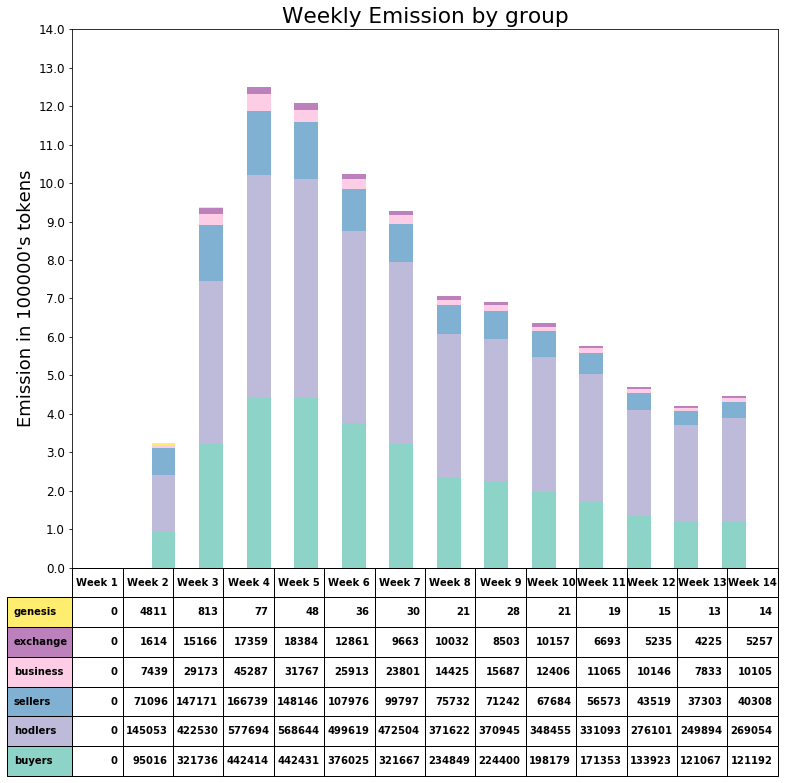

In [430]:
data_emission = [genesis_emission,
                 exchange_emission,
                 business_emission,
                 seller_emission,
                 hodler_emission,
                 buyer_emission]

values = np.arange(0, 15, 1)
step = 100000
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_emission)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_emission[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_emission[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_emission[row]
    t_text.append(['%1.0f' % (x) for x in y_offset])

emission_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

emission_table.auto_set_font_size(False)
emission_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Emission in {0}'s tokens".format(step),size=18,weight='light')
plt.yticks(values*step,['%1.1f' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Emission by group')
plt.show()

## Weekly balances by group

In [274]:
#Group days by week
weeks = []
for eday in emission_days[:-1]:
    w = []
    for day in tx_days:
        if day >= eday and day < emission_days[emission_days.index(eday)+1]:
            w.append(day)
    weeks.append(w)

In [287]:
def sender(tx):
    return tx[5]
def receiver(tx):
    return tx[6]
def sender_add(tx):
    return tx[1]
def receiver_add(tx):
    return tx[2]
def tx_date(tx):
    return tx[0][0:10]
def tx_amount(tx):
    return tx[3]

In [289]:
#Group transactions by week
tx_by_week = {}
for week in tqdm(weeks):
    tx_by_week[weeks.index(week)+1] = []
    for tx in transactions:
        if tx_date(tx) in week:
            tx_by_week[weeks.index(week)+1].append(tx)

100%|██████████| 13/13 [00:01<00:00,  8.05it/s]


In [470]:
seller_balance = [0]
hodler_balance = [0]
buyer_balance = [0]
exchange_balance = [0]
genesis_balance = [1000000000]
business_balance = [0]
seller_volume = [0]
hodler_volume = [0]
buyer_volume = [0]
exchange_volume = [0]
genesis_volume = [0]
business_volume = [0]

account_open = {}
accounts_old = []

#Prepare weekly data for plotting
fee = 20
for week in weeks:
    account_open[weeks.index(week)+1] = []
    exchange_b = exchange_balance[-1]
    genesis_b = genesis_balance[-1]
    seller_b = seller_balance[-1]
    buyer_b = buyer_balance[-1]
    hodler_b = hodler_balance[-1]
    business_b = business_balance[-1]
    exchange_v = 0
    genesis_v = 0
    seller_v = 0
    buyer_v = 0
    hodler_v = 0
    business_v = 0
    for tx in tx_by_week[weeks.index(week)+1]:
        if tx_date(tx) in week:
            
            if sender_add(tx) not in accounts_old:
                account_open[weeks.index(week)+1].append(sender_add(tx))
                accounts_old.append(sender_add(tx))
            if receiver_add(tx) not in accounts_old:
                accounts_old.append(receiver_add(tx))
                account_open[weeks.index(week)+1].append(receiver_add(tx))
            
            if sender(tx) == 'genesis':
                genesis_b -= float(tx_amount(tx)) + fee
                genesis_v += float(tx_amount(tx))
            if sender(tx) == 'exchange':
                exchange_b -= float(tx_amount(tx)) + fee
                exchange_v += float(tx_amount(tx))
            if sender(tx) == 'seller':
                seller_b -= float(tx_amount(tx)) + fee
                seller_v += float(tx_amount(tx))
            if sender(tx) == 'buyer':
                buyer_b -= float(tx_amount(tx)) + fee
                buyer_v += float(tx_amount(tx))
            if sender(tx) == 'hodler':
                hodler_b -= float(tx_amount(tx)) + fee
                hodler_v += float(tx_amount(tx))
            if sender(tx) == 'business':
                business_b -= float(tx_amount(tx)) + fee
                business_v += float(tx_amount(tx))
            
            if receiver(tx) == 'genesis':
                genesis_b += float(tx_amount(tx))
            if receiver(tx) == 'exchange':
                exchange_b += float(tx_amount(tx))
            if receiver(tx) == 'seller':
                seller_b += float(tx_amount(tx))
            if receiver(tx) == 'buyer':
                buyer_b += float(tx_amount(tx))
            if receiver(tx) == 'hodler':
                hodler_b += float(tx_amount(tx))
            if receiver(tx) == 'business':
                business_b += float(tx_amount(tx))
    seller_balance.append(seller_b)
    hodler_balance.append(hodler_b)
    buyer_balance.append(buyer_b)
    exchange_balance.append(exchange_b)
    genesis_balance.append(genesis_b)
    business_balance.append(business_b)
    seller_volume.append(seller_v)
    hodler_volume.append(hodler_v)
    buyer_volume.append(buyer_v)
    exchange_volume.append(exchange_v)
    genesis_volume.append(genesis_v)
    business_volume.append(business_v)
    
business_account_counter = [0]
buyer_account_counter = [0]
seller_account_counter = [0]
hodler_account_counter = [0]
for week in account_open.keys():
    b_acc = [user_types[_] for _ in account_open[week]]
    business_account_counter.append(b_acc.count('business')+business_account_counter[-1])
    buyer_account_counter.append(b_acc.count('buyer')+buyer_account_counter[-1])
    seller_account_counter.append(b_acc.count('seller')+seller_account_counter[-1])
    hodler_account_counter.append(b_acc.count('hodler')+hodler_account_counter[-1])

In [468]:
hodler_account_counter

[0, 149, 365, 579, 693, 730, 743, 746, 746, 746, 746, 746, 746, 746]

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


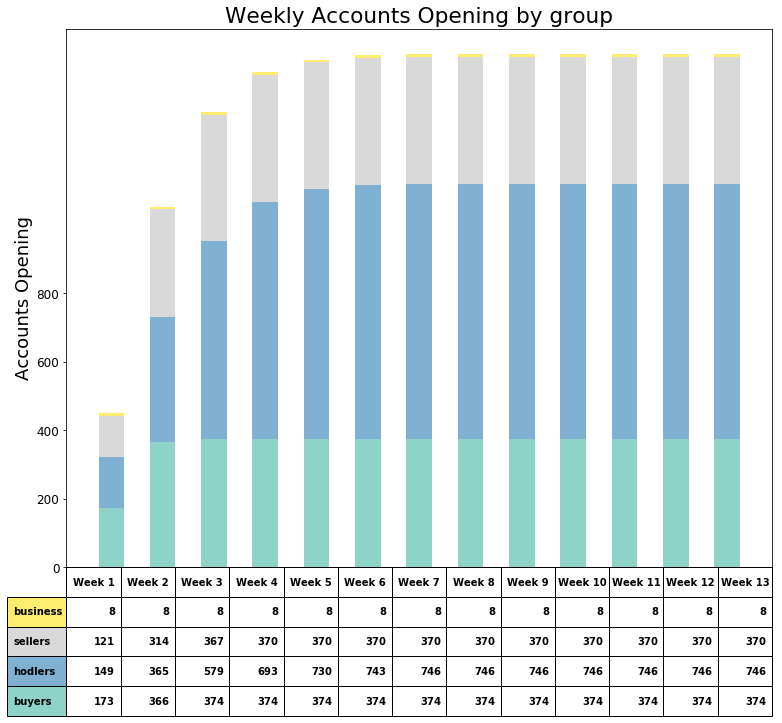

In [469]:
data_accounts = [business_account_counter[1:],
                 seller_account_counter[1:],
                 hodler_account_counter[1:],
                 buyer_account_counter[1:]]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13')

rows = ['business', 'sellers', 'hodlers', 'buyers']
#rows = rows[::-1]

values = np.arange(0, 1000, 200)
step = 1
colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_accounts)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))


for row in range(n_rows):
    plt.bar(index, data_accounts[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_accounts[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_accounts[row]
    t_text.append(['%d' % (x) for x in y_offset])

accounts_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

accounts_table.auto_set_font_size(False)
accounts_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Accounts Opening",size=18,weight='light')
plt.yticks(values*step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly Accounts Opening by group')
plt.show()

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


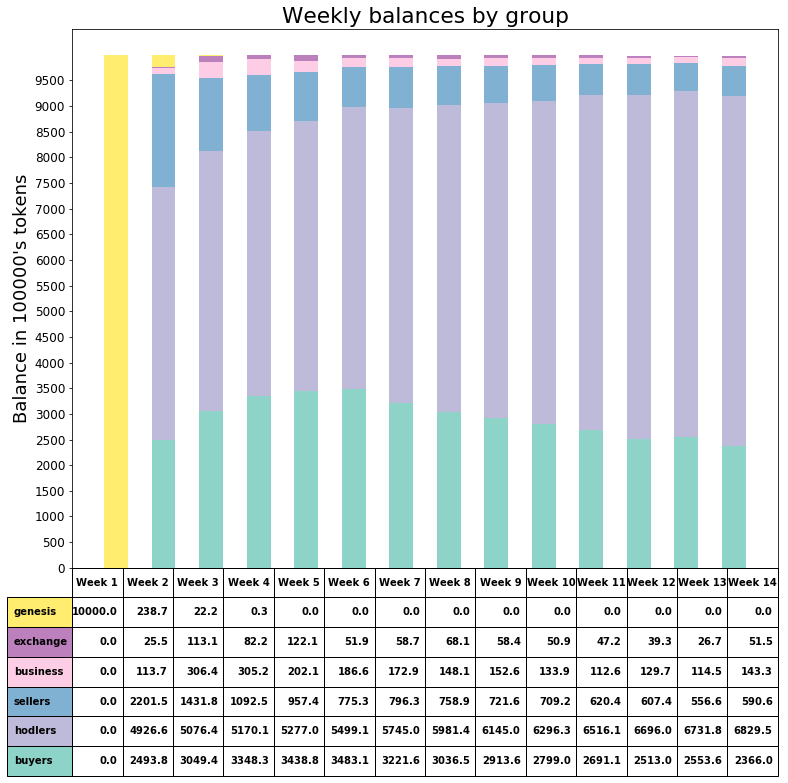

In [345]:
data = [genesis_balance,
        exchange_balance,
        business_balance,
        seller_balance,
        hodler_balance,
        buyer_balance]

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13', 'Week 14')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers']
#rows = rows[::-1]

values = np.arange(0, 10000, 500)
step = 100000

colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data[row]
    t_text.append(['%1.1f' % (x / 100000.0) for x in y_offset])

balance_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

balance_table.auto_set_font_size(False)
balance_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Balance in {0}'s tokens".format(step),size=18,weight='light')
plt.yticks(values * step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly balances by group')
plt.show()

/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


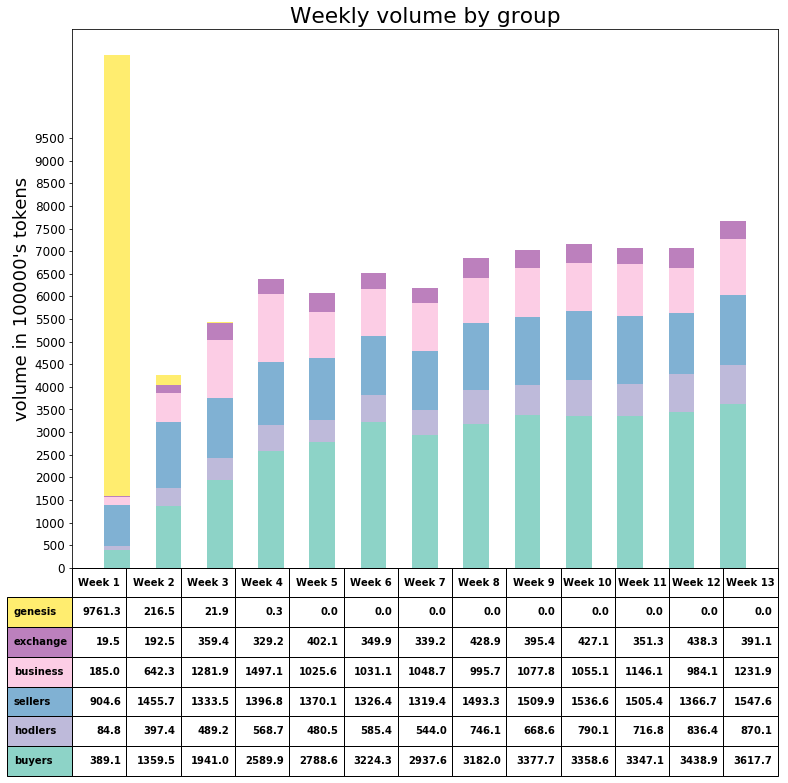

In [473]:
data_volume = [genesis_volume[1:],
               exchange_volume[1:],
               business_volume[1:],
               seller_volume[1:],
               hodler_volume[1:],
               buyer_volume[1:]]
             

columns = ('Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7',\
           'Week 8', 'Week 9', 'Week 10', 'Week 11', 'Week 12', 'Week 13')

rows = ['genesis', 'exchange', 'business', 'sellers', 'hodlers', 'buyers']
#rows = rows[::-1]

values = np.arange(0, 10000, 500)
step = 100000

colors = plt.cm.Set3(np.linspace(0, 1, len(rows)))
n_rows = len(data_volume)

index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

for row in range(n_rows):
    plt.bar(index, data_volume[::-1][row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_volume[::-1][row]

colors = colors[::-1]

y_offset = np.zeros(len(columns))
t_text= []

for row in range(n_rows):
    y_offset = data_volume[row]
    t_text.append(['%1.1f' % (x / 100000.0) for x in y_offset])

volume_table = plt.table(cellText=t_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

volume_table.auto_set_font_size(False)
volume_table.set_fontsize(10)


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("volume in {0}'s tokens".format(step),size=18,weight='light')
plt.yticks(values * step, ['%d' % val for val in values],size=12,weight='light')
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(14,11)
plt.title('Weekly volume by group')
plt.show()

## Fees and transaction count

In [221]:
total_fees_paid = 0
for j in emission_data['2018-07-01']:
    total_fees_paid += j[7]
    
print('Total fees:', total_fees_paid, 'Transaction count:', total_fees_paid/20)

Total fees: 1923200.0 Transaction count: 96160.0


## Sum of account activities in the system weekly

[0.8, 0.9999887467999997, 0.9996878699569993, 0.9988658477949999, 0.9977744341810016, 0.9967047817599991, 0.9957720331900005, 0.9949093319800002, 0.9942103320000003, 0.9935140127, 0.9928518277000004, 0.9922309949000006, 0.9916894077000005, 0.9911774707999993]


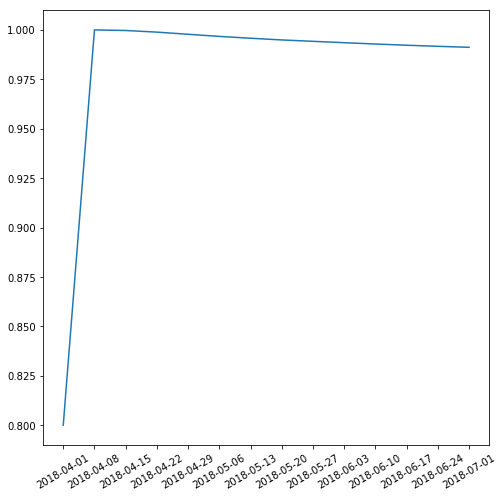

In [222]:
activities = []
for day in emission_days:
    total_activity = 0
    for j in emission_data[day]:
        total_activity += j[4]
    
    activities.append(total_activity)
print(activities)
plt.plot(activities)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days)), emission_days, rotation=30)
plt.show()

## Account activity weekly 

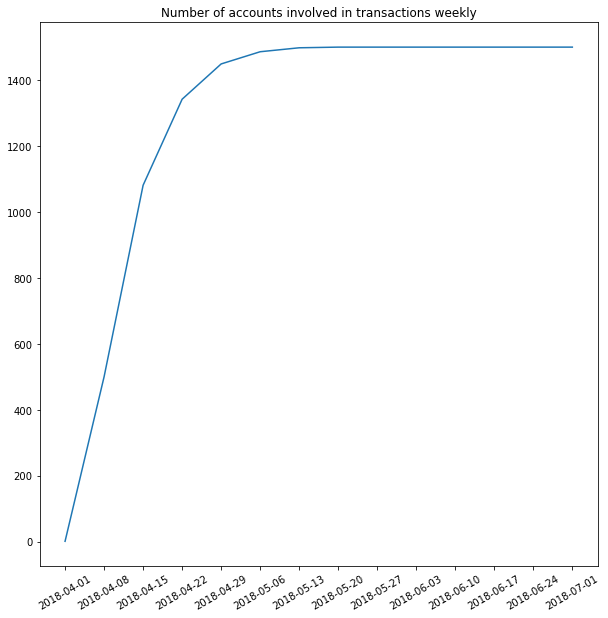

In [234]:
active_nodes_weekly = [len(emission_data[day]) for day in emission_days]
plt.plot(active_nodes_weekly)
plt.title('Number of accounts involved in transactions weekly')
plt.xticks(range(len(emission_days)), emission_days, rotation=30)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## 20% of tokens held by the richest wallets (meaning accounts)

In [223]:
top_twenty_percent = 0
j = 0
while top_twenty_percent < 0.2*total_sum_end:
    top_twenty_percent += sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1]
    #print(sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][0],\
          #sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1])
    j +=1
print(j,'wallets', top_twenty_percent, 'volume of tokens')

64 wallets 201572240.0 volume of tokens


In [12]:
business_dynamics = {}
for day in emission_days:
    business_dynamics[day] = []
    for b in businesses:
        bdays = [d[0] for d in emission_data[day]]
        if b in bdays:
            business_dynamics[day].append(emission_data[day][bdays.index(b)])

## Emission received by businesses

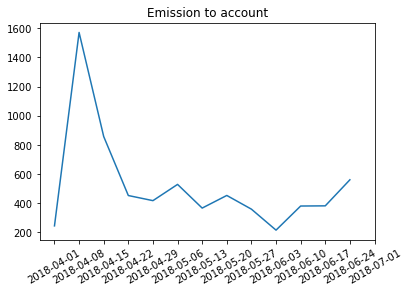

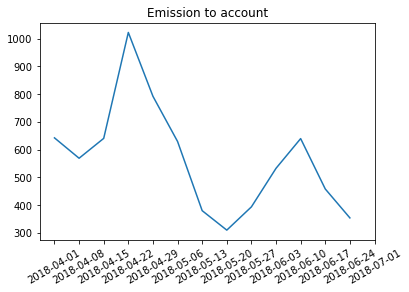

In [231]:
business_plots = {}
for b in businesses[0:2]:
    business_plots[b] = []
    for day in emission_days[1:]:
        business_plots[b].append(business_dynamics[day][businesses.index(b)])
for b in businesses[0:2]:
    plt.plot([i[5] for i in business_plots[b]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Emission to account')
    plt.show()

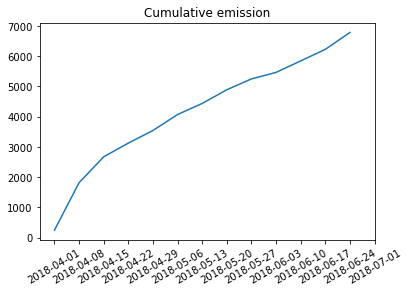

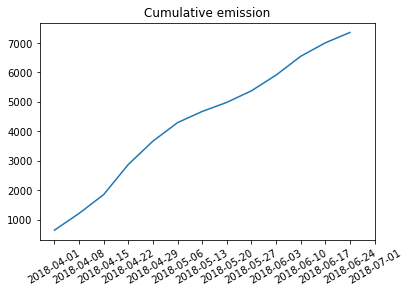

In [232]:
for b in businesses[0:2]:
    plt.plot([i[6] for i in business_plots[b]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Cumulative emission')
    plt.show()